Análise e Reconhecimento de Padrões -  Filipe Antunes Marinho - 10438866
===


Parte A: 
---
 - Gerar 200 padrões a partir de cada um dos 3 autômatos de 2 nós nas Figuras 6(a-c). Visualizar  alguns  destes  padrões utilizando-se gráficos do tipo stem, square wave e barplot.
    
    
    
 - Utilizar  tamanhos  dos  padrões  $M  =  500,  750,  ...,  2000$. Obter a média e o desvio padrão da  frequência  relativa  de  símbolos  1s  relativas  ao  conjunto  de  sinais  gerados  para  cada autômato  de  tamanho  $M$. Desenhar  todas  as  densidades  de  probabilidades  normais especificadas  por  estas  médias  e  desvios.
    
    
 - Objetivo: reproduzir  os  resultados nas Figuras 13 e 14.

In [1]:
from P1aux import *

#Função usada para gerar os automatos a partir da matriz de probabilidades, retorna proximo numero da sequencia
def nextStep(last, matriz):
    i = 0
    p = matriz[last][0]
    r = np.random.random(1)[0]
    
    while r>p:
        i = i+1
        p =p+ matriz[last][i]
    return i

#função que gera um automato de tamanho M 
def new_automato(matriz, M = 200):
    automato = [0]
    while len(automato) < M:
        automato.append(nextStep(automato[-1], matriz))
    return automato


#Matrizes de probabilidades
A = np.array([[0.9, 0.1],[0.9, 0.1]])
B = np.array([[0.2, 0.8], [0.2, 0.8]])
C = np.array([[0.5, 0.5],[0.5, 0.5]])


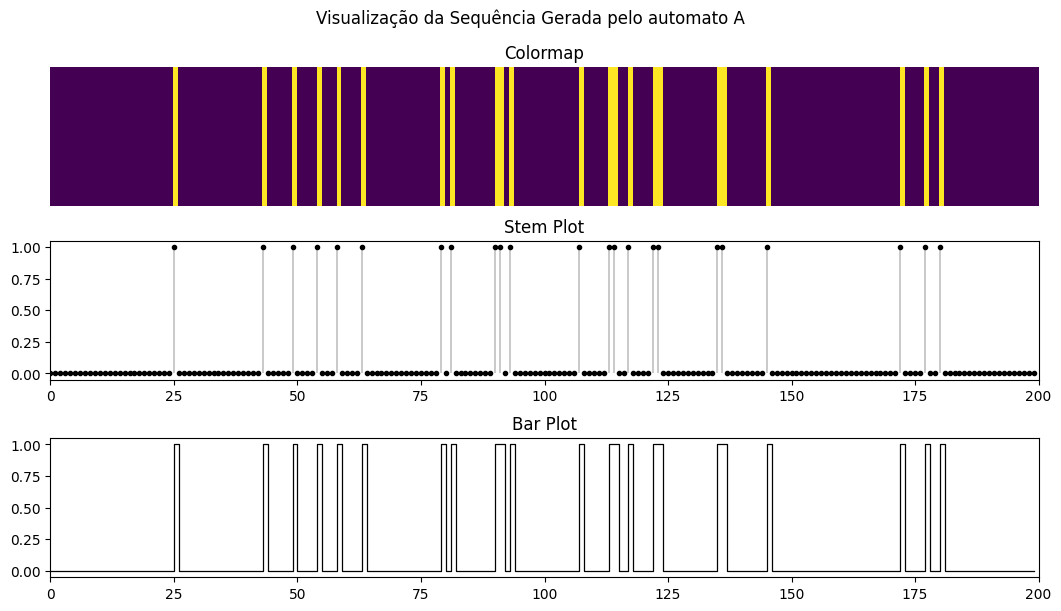

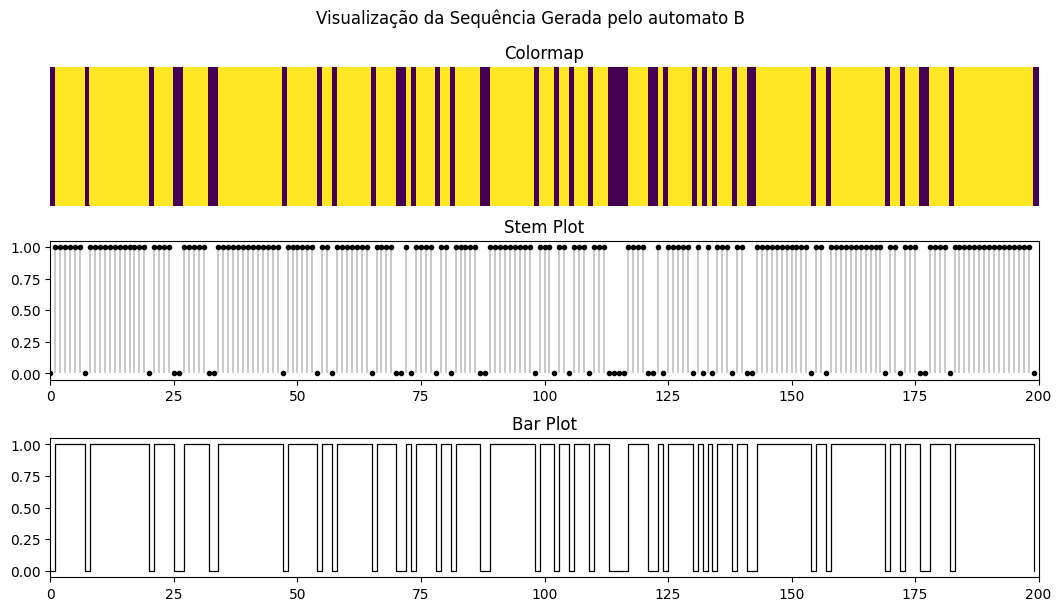

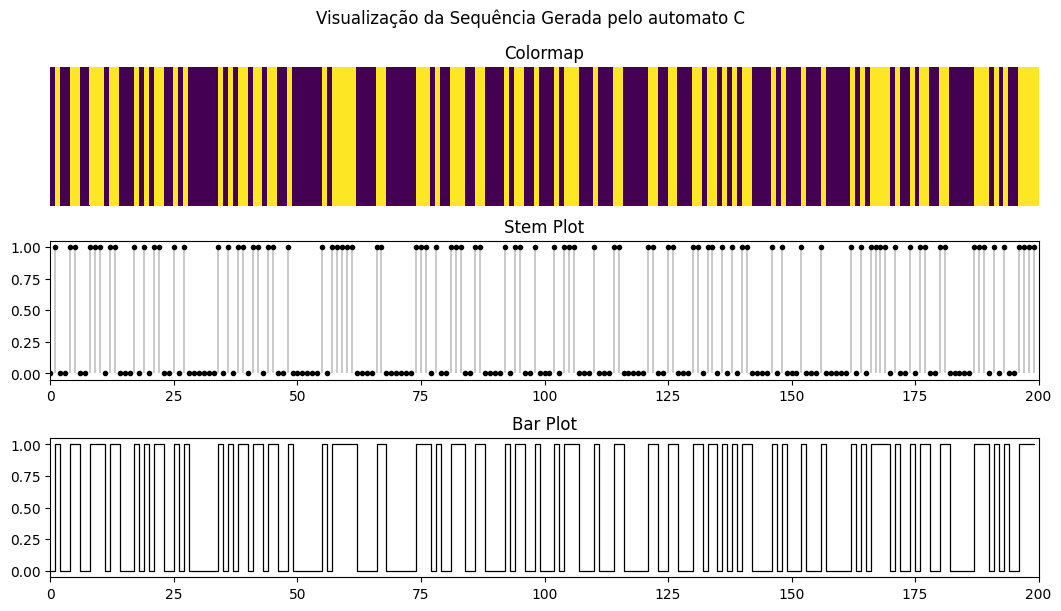

In [2]:
#Gerando 200 padrões dos automatos A, B e C
automato_a = new_automato(A,200)
automato_b = new_automato(B,200)
automato_c = new_automato(C,200)

plot(automato_a, "A")
plot(automato_b, "B")
plot(automato_c, "C")

         Média    Desvio
500   0.099640  0.014494
750   0.101053  0.010534
1000  0.099210  0.010103
1250  0.098408  0.008746
1500  0.099053  0.007741
1750  0.099389  0.006682


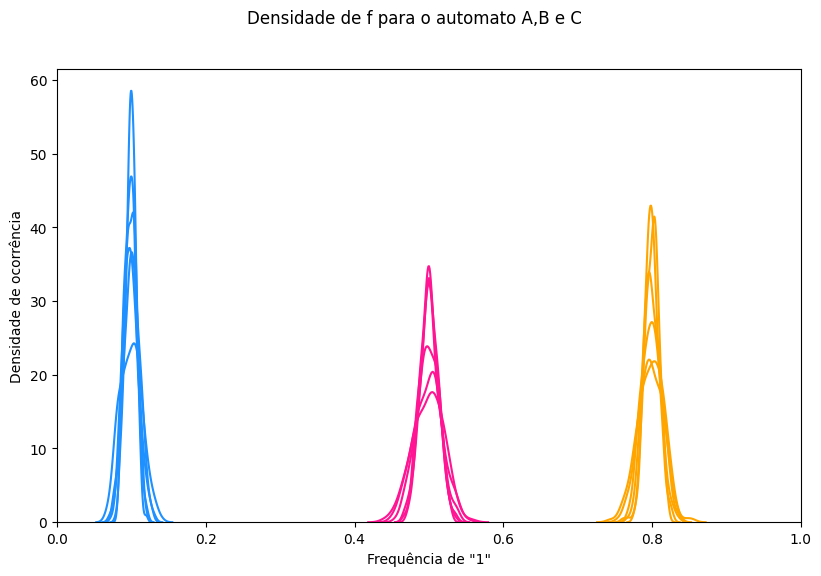

In [10]:
#Probabilidades normais
plt.figure(figsize=(9.6,6), dpi = 100)
means, std, m = [],[],[]
#Loop para variar o tamanho M entre [500,750,1000,...,2000]
for M in range(500,2000,250):
    #loop para gerar os 200 automatos
    f_a, f_b, f_c = [], [], []
    for N in range(200):
        #loop para criar os automatos com tamanho M
        automato_a = new_automato(A, M)
        automato_b = new_automato(B, M)
        automato_c = new_automato(C, M)
        f_a.append(freq(automato_a,1))
        f_b.append(freq(automato_b,1))
        f_c.append(freq(automato_c,1))
    plotDensity([f_a, f_b, f_c], "A,B e C ")
    
    #Calculo dos momentos 
    means.append(np.array(f_a).mean()) 
    std.append(np.array(f_a).std())
    m.append(M)
    
data = {"Média":means, "Desvio": std}
print(pd.DataFrame(data, index = m))

plt.show()

 Parte B: 
---
<h3>

 - Gerar e visualizar padrões produzidos pelos autômatos nas Figuras 6(d) e (e)<h3>

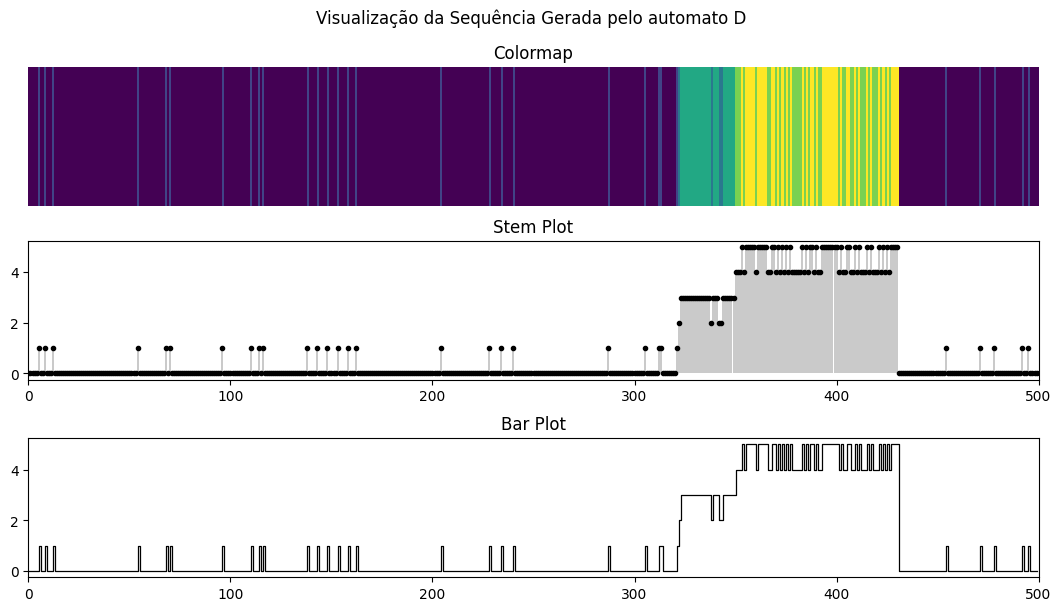

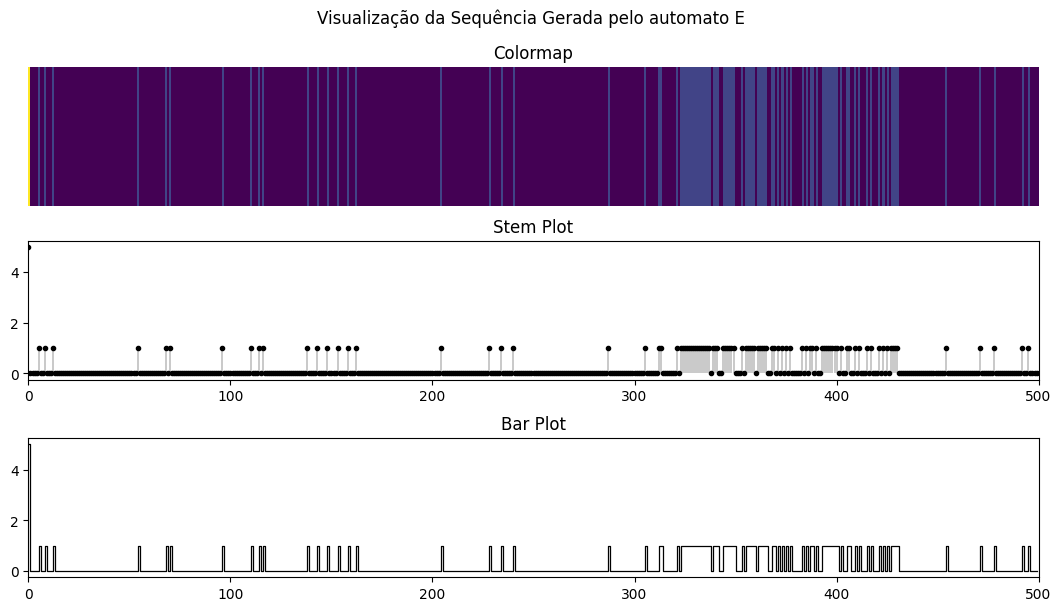

In [4]:
#Matrizes de probabilidades
D = np.array([[0.9,0.1,0,0,0,0],[0.882,0.098,0.02,0,0,0],[0,0,0.2,0.8,0,0],[0,0,0.194,0.776,0.03,0],[0,0,0,0,0.5,0.5],[0.01,0,0,0,0.495,0.495]])
E = D
aux = {0:0, 1:1, 2:0, 3:1, 4:0, 5:1} #Usado para transformar o output do automato E em 0 e 1.

#Inicializando a sequencia
automato_d, automato_e = [0],[5]

#Gerando os automatos com tamanho 500
while len(automato_d) < 500:
    automato_d.append(nextStep(automato_d[-1], D))
    automato_e.append(aux[automato_d[-1]])

#Plot

plot(automato_d, "D")
plot(automato_e, "E")
